# Titanic - Machine Learning from Disaster - Parte 1


- [Dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)
    - É um dataset de **competição**
    - O resultado é avaliado através da **acurácia**:
        - _"Sua pontuação é a porcentagem de passageiros que você prevê corretamente. Isso é conhecido como acurácia."_

O **objetivo** deste projeto de **análise preditiva** é melhorar a acurácia do modelo de Machine Learning que será testado, escolhido e implementado. 

In [1]:
# Importando bibliotecas
import pandas as pd

In [2]:
# Leitura do dataset
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Gerando relatório analítico em HTML pelo ydata_profiling
# O objetivo deste "quick report" é um overview inicial dos dados de uma banco de dados + disponibilidade de material analítico

from ydata_profiling import ProfileReport
profile = ProfileReport(train, title='titanic_train')
profile.to_file("titanic_train.html")

C:\Users\Sepp-Kali-Linux\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.67it/s]


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [8]:
train.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [9]:
import pandas as pd
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
test.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

* Nota:  distinção de variáveis nulas entre bases de teste e treino.

In [12]:
train.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [13]:
train.shape

(891, 12)

In [14]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


* Colunas com forte distinção como Nome, Ticket, Cabine são variáveis consideradas de **alta cardinalidade**

In [15]:
# Verificação de cardinalidade das variáveis na base de trieno

train.nunique().sort_values(ascending=False)



PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [16]:
# Harmonizando a estrutura dos dados de treino e teste

train = train.drop(['Cabin', 'Name', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [17]:
# Tratamento de dados: aplicação da média das idades nas células vazias da coluna 'Age', por se tratar de variável direta de correlação e causalidade
train.Age.mean()

29.69911764705882

In [18]:
train.loc[train.Age.isnull(), 'Age'] = train.Age.mean()
test.loc[test.Age.isnull(), 'Age'] = test.Age.mean()

In [19]:
# Verfificação de frequência da coluna 'Embarked'
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Idenficação da frequência de 'moda' para substituir valores null
train.Embarked.mode()[0]

'S'

In [21]:
# Substituição de valores null pela moda identificada na análise das frequências 
train.loc[train.Embarked.isnull(), 'Embarked'] = train.Embarked.mode()[0]

In [22]:
train.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [23]:
test.isnull().sum().sort_values(ascending=False).head(5)

Fare           1
PassengerId    0
Pclass         0
Sex            0
Age            0
dtype: int64

In [24]:
#test.Fare.mean()
test.loc[test.Fare.isnull(), 'Fare'] = test.Fare.mean()

In [25]:
test.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

In [26]:
col_train_nr = train.columns[train.dtypes != 'object']
col_train_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [27]:
#train_nr = train.loc[:, train.columns[train.dtypes != 'object']]
train_nr = train.loc[:, col_train_nr]

In [28]:
col_test_nr = test.columns[test.dtypes != 'object']
col_test_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

A variável 'Survived' será a variável de análise preditiva. Este é o motivo dela existir no index de treino e não em teste.

In [29]:
test_nr = test.loc[:, col_test_nr]
test_nr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


Este é o momento de separar as bases para treino e **validação**
* Faremos este processo utilizando a biblioteca 'train_test_split'

In [30]:
# Importando a biblioteca
from sklearn.model_selection import train_test_split

In [31]:
# Separando a base de treino em X e y

X = train_nr.drop(['PassengerId','Survived'],axis=1)
y = train.Survived

In [32]:
# Separando a base em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Este é o momento do teste dos algoritmos de Machine Learning
* Inicialmente, testaremos três modelos:
    - Decision Tree
    - KNN
    - Logistic Regression

Modelo 1 - Decision Tree

In [33]:
# Importando a biblioteca
from sklearn import tree

In [34]:
# Criando o Classificador
clf_dt = tree.DecisionTreeClassifier(random_state=42)

In [35]:
# Fazendo fit com os dados de treino
clf_dt = clf_dt.fit(X_train, y_train)

In [36]:
# Fazendo o previsão
clf_dt.predict(X_val)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [37]:
y_predict_dt = clf_dt.predict(X_val)
y_predict_dt

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

Modelo 2 - KNN

In [38]:
# Importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Criando o Classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
# Fazendo fit com os dados de treino
clf_kn = clf_knn.fit(X_train, y_train)

In [41]:
# Fazendo o previsão
clf_knn.predict(X_val)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [42]:
y_predict_knn = clf_knn.predict(X_val)

In [43]:
# Importando a biblioteca

from sklearn.linear_model import LogisticRegression

In [44]:
# Criando o Classificador

clf_lr = LogisticRegression(random_state=42)

In [45]:
# Fazendo fit com os dados de treino
clf_lr = clf_lr.fit(X_train, y_train)

In [46]:
# Fazendo o previsão
clf_lr.predict(X_val)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [47]:
y_predict_lr = clf_lr.predict(X_val)

Avaliação de modelos de Machine Learning

1 - Accuracy

In [48]:
# Importando a biblioteca
from sklearn.metrics import accuracy_score

In [49]:
# Accuracy para DT
accuracy_score(y_val, y_predict_dt)

0.6424581005586593

In [50]:
# Accuracy para KNN
accuracy_score(y_val, y_predict_knn)

0.664804469273743

In [51]:
# Accuracy para LR
accuracy_score(y_val, y_predict_lr)


0.7318435754189944

2 - Confusion Matrix
- Acurácia (Accuracy): É a proporção de amostras classificadas corretamente em relação ao total de amostras.
Acurácia = (TP + TN) / (TP + TN + FP + FN)
- Precisão (Precision): É a proporção de verdadeiros positivos em relação ao total de positivos previstos.
Precisão = TP / (TP + FP)
- Revocação ou Sensibilidade (Recall/Sensitivity): É a proporção de verdadeiros positivos em relação ao total de positivos reais.
Revocação = TP / (TP + FN)
- F1-score: É a média harmônica entre a precisão e a revocação.
    - F1-score = 2 * (Precisão * Revocação) / (Precisão + Revocação)

In [52]:
# Importando a biblioteca
from sklearn.metrics import confusion_matrix

In [53]:
# CMatrix para DT
confusion_matrix(y_val, y_predict_dt)

array([[79, 26],
       [38, 36]], dtype=int64)

- Acurácia = (79 + 36) / (79 + 26 + 38 + 36) ≈ 0.622
- Precisão = 79 / (79 + 26) ≈ 0.752
- Revocação = 79 / (79 + 38) ≈ 0.675
- F1-score = 2 * (0.752 * 0.675) / (0.752 + 0.675) ≈ 0.711

In [54]:
# CMatrix para KNN
confusion_matrix(y_val, y_predict_knn)

array([[86, 19],
       [41, 33]], dtype=int64)

- Acurácia = (86 + 33) / (86 + 19 + 41 + 33) ≈ 0.656
- Precisão = 86 / (86 + 19) ≈ 0.819
- Revocação = 86 / (86 + 41) ≈ 0.677
- F1-score = 2 * (0.819 * 0.677) / (0.819 + 0.677) ≈ 0.741

In [55]:
# CMatrix para LR
confusion_matrix(y_val, y_predict_lr)

array([[94, 11],
       [37, 37]], dtype=int64)

- Acurácia = (94 + 37) / (94 + 11 + 37 + 37) ≈ 0.722
- Precisão = 94 / (94 + 11) ≈ 0.895
- Revocação = 94 / (94 + 37) ≈ 0.717
- F1-score = 2 * (0.895 * 0.717) / (0.895 + 0.717) ≈ 0.797

In [56]:
# X_train Viz
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
331,1,45.5,0,0,28.500
733,2,23.0,0,0,13.000
382,3,32.0,0,0,7.925


In [73]:
# Base de teste Viz (apenas nr)
test_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [74]:
# Eliminação de coluna para harmonização da estrutura dos dados
X_test = test_nr.drop("PassengerId", axis=1)

In [59]:
# Atribuição de modelo escolhido na base de teste
y_pred = clf_lr.predict(X_test)

In [65]:
# Criação de nova coluna com a previsão na base de teste
test['Survived'] = y_pred

In [72]:
# Seleção de colunas de envio
base_delivered = test[['PassengerId', 'Survived']]

In [77]:
base_delivered.to_csv('attempt1.csv', index=False)

Resultado: 67% de acurácia nas previsões do attempt 1
- Critério de avaliação do modelo: acurácia
- A primeira versão do sistema alcançou uma acurácia de 67% no score da competição de análise preditiva. A meta é melhorar a acurácia de 67% para 85%

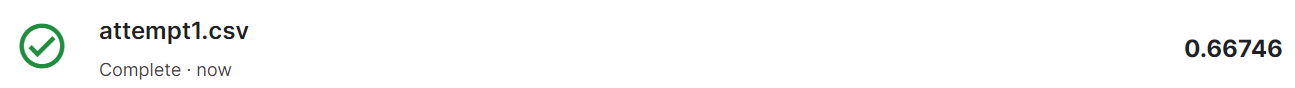